#**Installing Transformers**

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.0 MB/s eta 0:00:00


# **Installing Important Packages**

In [2]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import re

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

# **Reading Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/422 Final Project/train_all_tasks.csv")

In [5]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [6]:
df.shape

(14000, 5)

In [7]:
df.isna().sum()                                                              # finding the total number of missing values for each column

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
dtype: int64

In [8]:
df = df.drop(["rewire_id","label_category", "label_vector"], axis=1)         # removing unnecessary columns that has no value

In [9]:
df.head(5)                                                                    

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


# **Data Visualization**

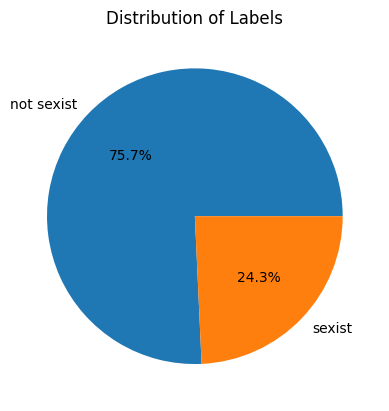

not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64


In [10]:
counts = df.label_sexist.value_counts()                                   # counting unique values in the label_sexist column
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Distribution of Labels")
plt.show()

print(counts)

In [11]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [12]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(df,names='label_sexist',title='sexist, not sexist',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [13]:
print(df.columns)

Index(['text', 'label_sexist'], dtype='object')


In [14]:
df['label_sexist'] = df['label_sexist'].map({'sexist':1, 'not sexist':0})

In [15]:
df.sample(5)

,text,label_sexist
820,lol nobody cares what you have to say rostie g...,1
8999,"Ask her to hang out, one on one.",0
4417,Finger her with your penis.,1
9678,No Islamic country treats women as equals. Mus...,0
3724,"Here's to gunpowder and pussy, Live by one, di...",1


In [16]:
df = df.sample(frac=1)

In [17]:
df.columns

Index(['text', 'label_sexist'], dtype='object')

In [18]:
def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W", " ", text)
  text = re.sub('https?://\S+|www.\.S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

df['text'] = df['text'].apply(clean_text)

# **Training Phase**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import joblib

## **Split Data**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_sexist'], test_size=0.2, random_state=42)
print(X_train.shape[0], X_test.shape[0])

11200 2800


# **CountVectorizer to convert text into vectors**

In [21]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train_vec, y_train)
accuracies = {}

In [23]:
from sklearn.metrics import accuracy_score

predictions1 = knn.predict(X_test_vec)
a1=accuracy_score(y_test, predictions1)
print(a1)
accuracies['KNN'] = a1

0.7646428571428572


In [24]:
# are test and predicted value same

pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions1
pred_df

,True values,Predicted values
8585,0,0
13674,0,0
466,0,0
3039,0,0
2023,0,0
...,...,...
9800,0,0
1368,0,0
6042,0,0
5515,0,0


In [25]:
classificationreport = classification_report(y_test, predictions1) 
print(classificationreport)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2140
           1       1.00      0.00      0.00       660

    accuracy                           0.76      2800
   macro avg       0.88      0.50      0.43      2800
weighted avg       0.82      0.76      0.66      2800



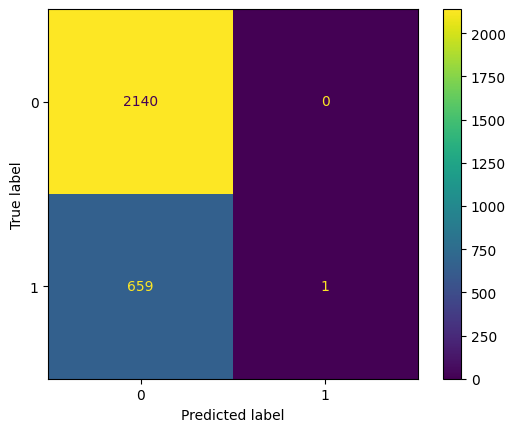

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **Logistic Regression**

In [27]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

**Saving the Model**

In [28]:
joblib.dump(model, 'sexism.joblib')

['sexism.joblib']

In [29]:
lr_prediction = model.predict(X_test_vec)

In [30]:
model.score(X_test_vec, y_test) * 100

81.71428571428572

In [31]:
report = classification_report(y_test, lr_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2140
           1       0.80      0.30      0.44       660

    accuracy                           0.82      2800
   macro avg       0.81      0.64      0.66      2800
weighted avg       0.81      0.82      0.78      2800



In [32]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
accuracies = {}

lr_prediction = lr.predict(X_test_vec)
a2=accuracy_score(y_test, lr_prediction)
print(a2)
accuracies['Logistic Regression'] = a2

0.8171428571428572


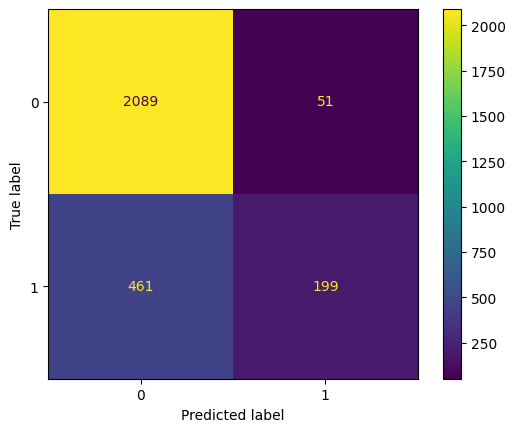

In [33]:
cm = confusion_matrix(y_test, lr_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
print(confusion_matrix(y_test, lr_prediction))

[[2089   51]
 [ 461  199]]


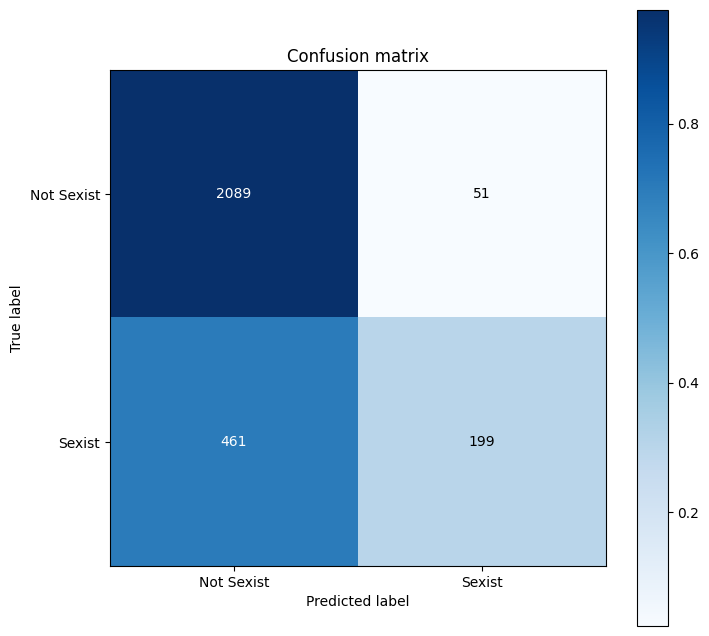

In [35]:
def draw_confusion_matrix(y_TEST, y_PRED, classes=["Not Sexist", "Sexist"]):
  # Generating the confusion matrix
  cm = confusion_matrix(y_TEST, y_PRED)
  
  # Normalizing the confusion matrix
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
  # plot the confusion matrix
  fig, ax = plt.subplots(figsize=(8, 8))
  im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.set(xticks=np.arange(cm_norm.shape[1]),
         yticks=np.arange(cm_norm.shape[0]),
         xticklabels=classes, yticklabels=classes,
         title='Confusion matrix',
         ylabel='True label',
         xlabel='Predicted label')
  
  # Add color bar
  fig.colorbar(im)
  
  # Loop over data to create annotations
  for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
      ax.text(j, i, format(cm[i, j], 'd'),
              ha="center", va="center",
              color="white" if cm_norm[i, j] > 0.5 else "black")
      
  plt.show()

draw_confusion_matrix(y_test, lr_prediction)

# **Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [37]:
DT = DecisionTreeClassifier()
DT.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [38]:
dt_prediction = DT.predict(X_test_vec)

In [39]:
DT.score(X_test_vec, y_test) * 100

78.39285714285714

In [40]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2140
           1       0.54      0.52      0.53       660

    accuracy                           0.78      2800
   macro avg       0.70      0.69      0.70      2800
weighted avg       0.78      0.78      0.78      2800



In [41]:
DT = DecisionTreeClassifier(criterion='entropy',random_state=1)
DT.fit(X_train_vec,y_train)
dt_prediction = DT.predict(X_test_vec)
a4=accuracy_score(dt_prediction,y_test)
print(a4)
accuracies['Decision Tree'] = a4

0.7789285714285714


Text(95.72222222222221, 0.5, 'True label')

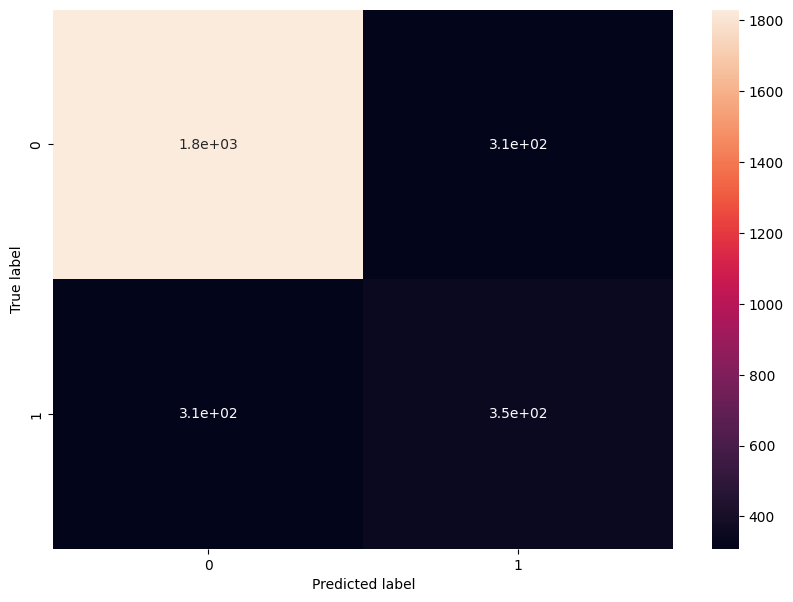

In [42]:
#from sklearn.metrics import confusion_matrics
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_prediction)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# **Naive Bayes**

In [43]:
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

model_LR2 = LogisticRegression(max_iter=20000).fit(X_train_vec,y_train)
model_SVM2 = SVC(kernel='rbf', random_state = 42).fit(X_train_vec, y_train)
model_NB2 = ComplementNB().fit(X_train_vec,y_train)

In [44]:
NB_score = classification_report(y_test, model_NB2.predict(X_test_vec))
print(NB_score)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2140
           1       0.65      0.17      0.26       660

    accuracy                           0.78      2800
   macro avg       0.72      0.57      0.57      2800
weighted avg       0.76      0.78      0.73      2800



In [45]:
NB2 = SVC()
NB2.fit(X_train_vec,y_train)

NB_score = NB2.predict(X_test_vec)
a3=accuracy_score(y_test, NB_score)
print(a3)
accuracies['SVM'] = a3

0.8242857142857143


#**Comparing accuracy of the four models**

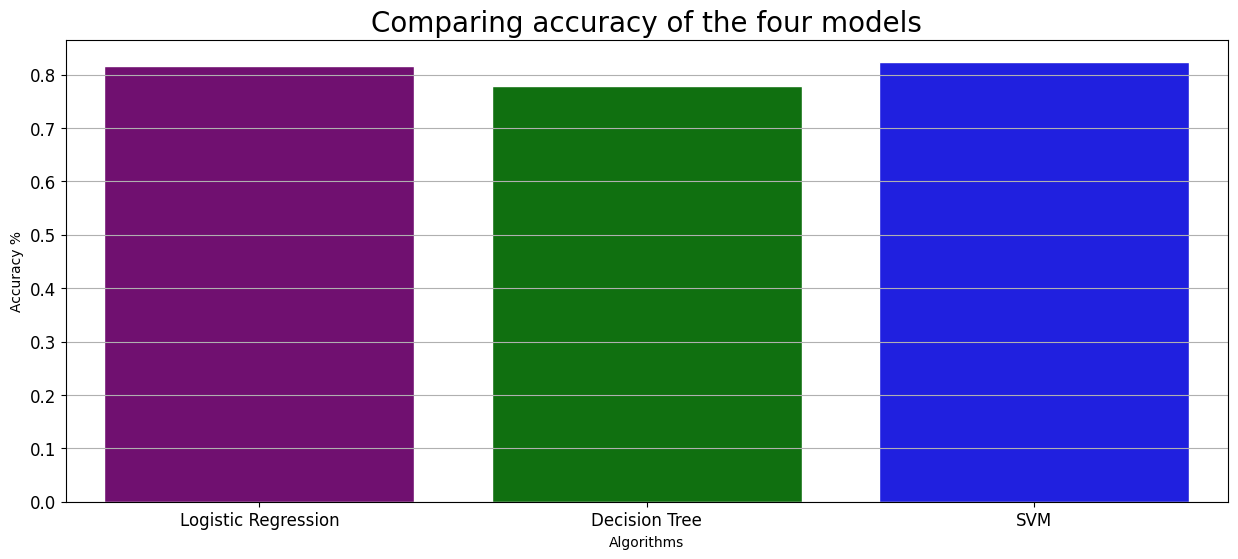

In [46]:
colors = ["purple", "green", "blue", "red"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()